In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv('../data/data.csv')
genre_data = pd.read_csv('../data/data_by_genres.csv')
year_data = pd.read_csv('../data/data_by_year.csv')


In [10]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


## EDA

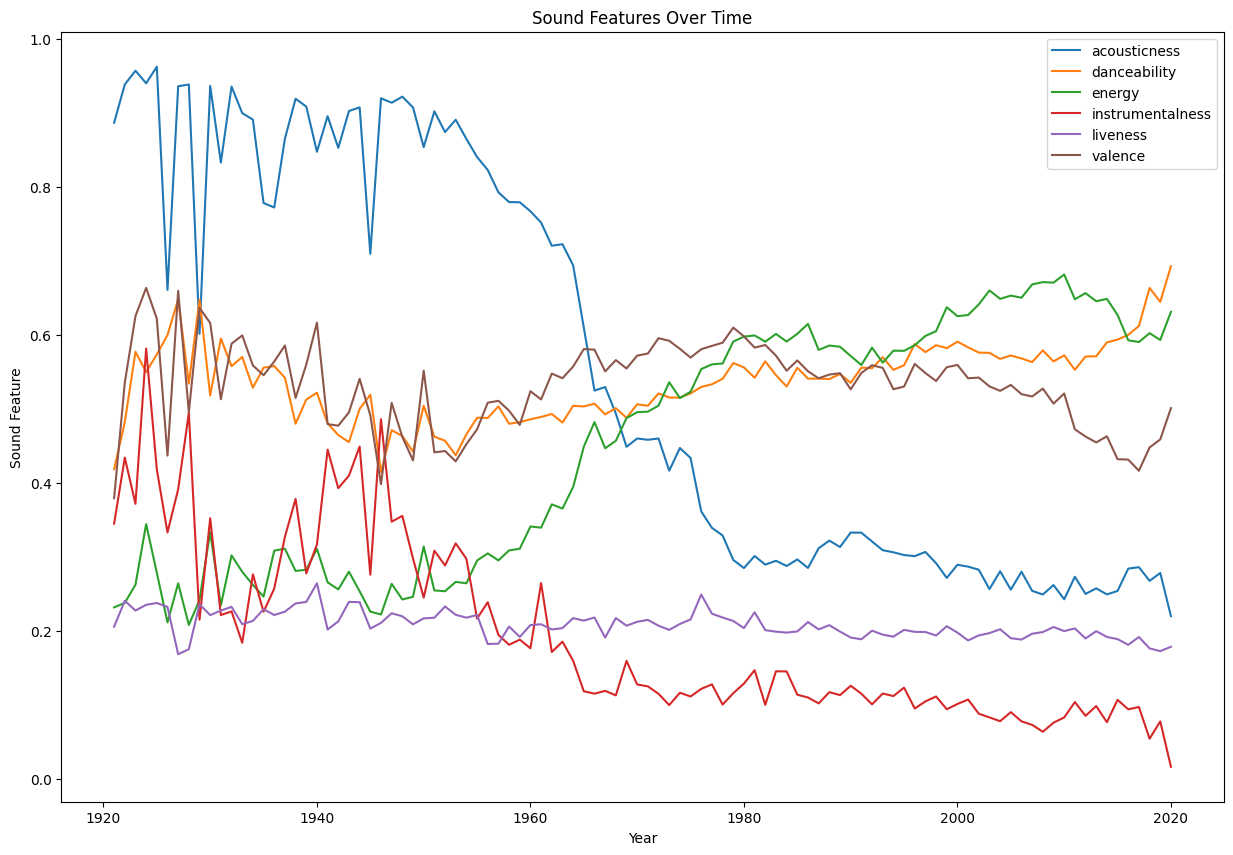

In [22]:
#I'll try some sound_features and see how they've changed over the years

sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

## Graph all of them in a single plot
fig, ax = plt.subplots(figsize=(15, 10))
for feature in sound_features:
    ax.plot(year_data['year'], year_data[feature], label=feature)
ax.set_xlabel('Year')
ax.set_ylabel('Sound Feature')
ax.set_title('Sound Features Over Time')
ax.legend()
plt.show()


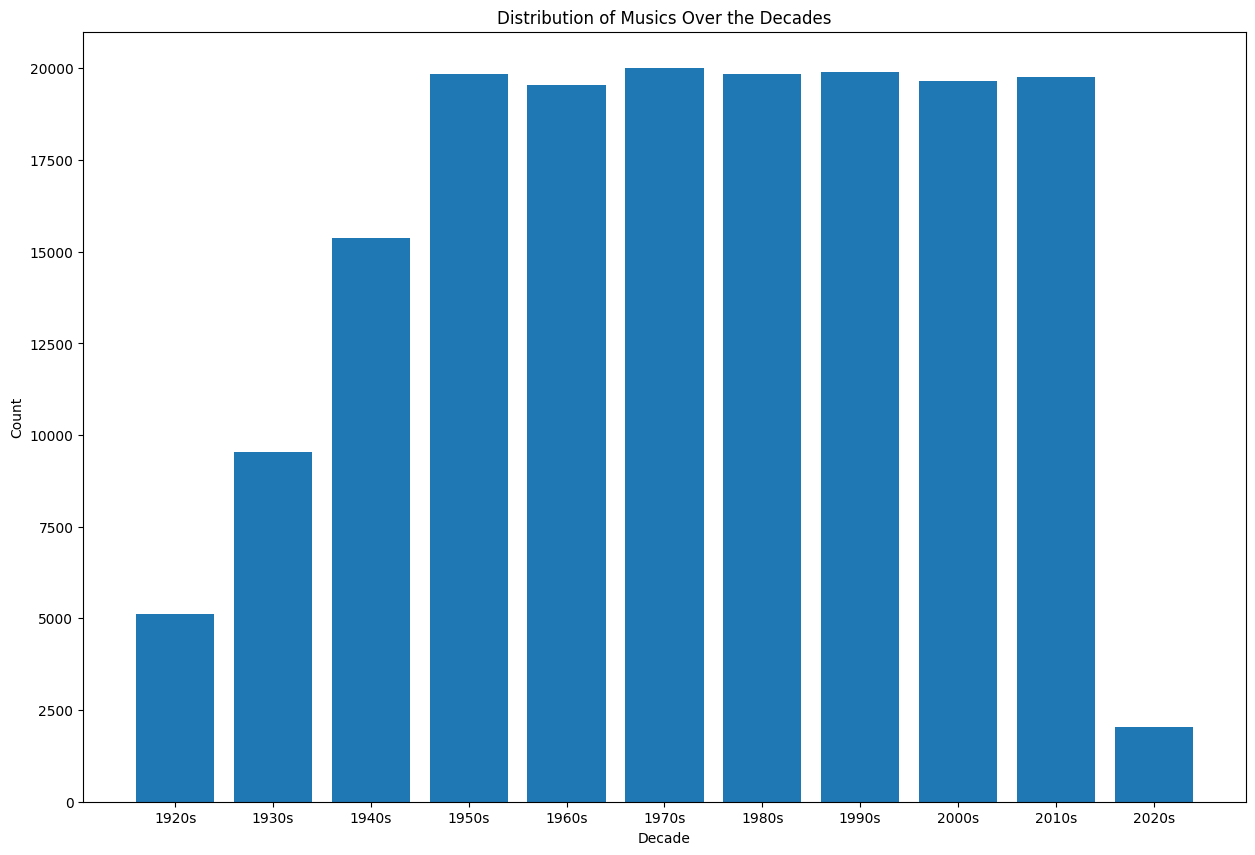

In [24]:
## How well distributed are the musics over the decades?

data['decade'] = data['year'].apply(lambda x: str(x)[0:3] + '0s')
decade_data = data.groupby('decade').count()['id'].reset_index()
decade_data.columns = ['decade', 'count']
## Graph the distribution
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(decade_data['decade'], decade_data['count'])
ax.set_xlabel('Decade')
ax.set_ylabel('Count')
ax.set_title('Distribution of Musics Over the Decades')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_25724\1028515932.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


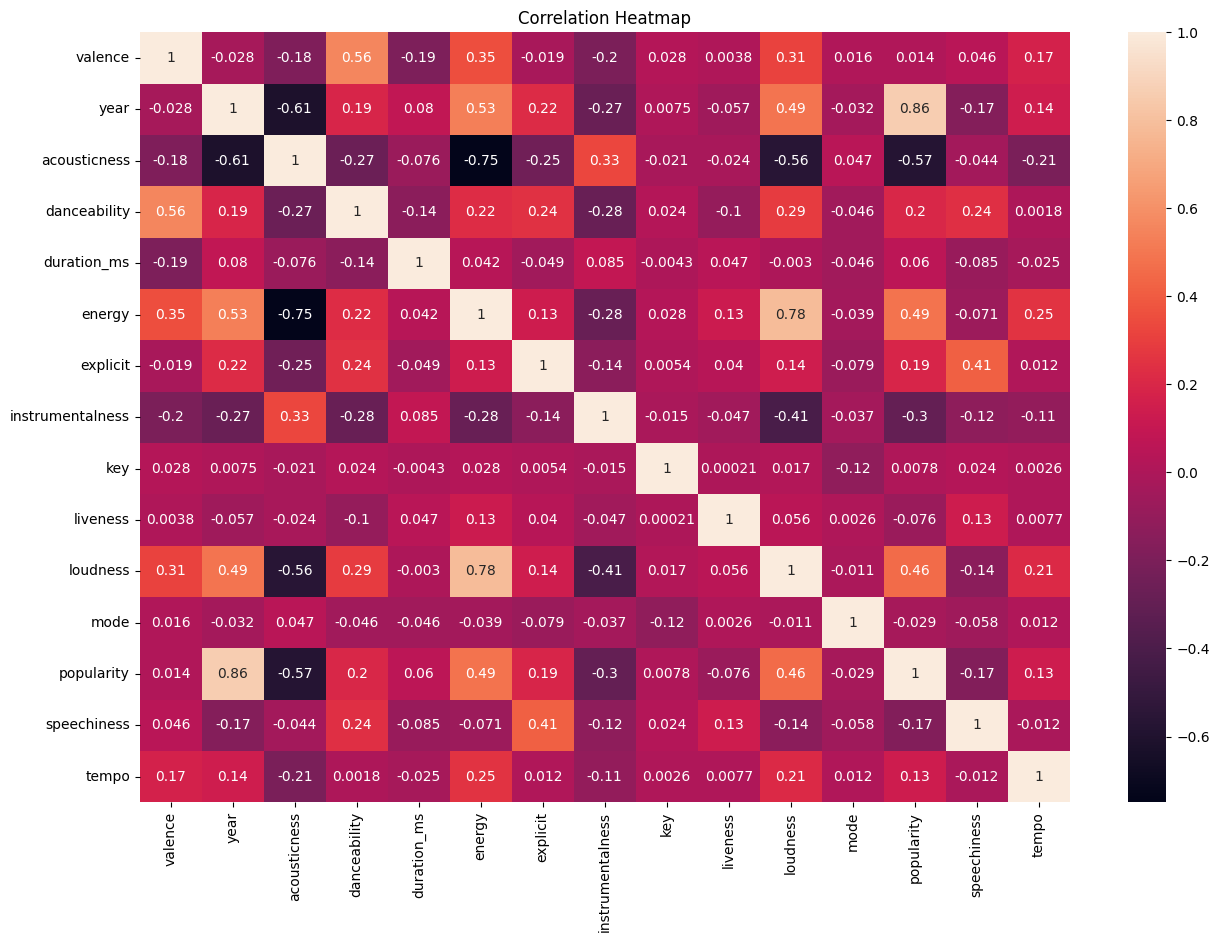

In [26]:
# Correlation with variables

corr = data.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, ax=ax)
ax.set_title('Correlation Heatmap')
plt.show();


<AxesSubplot: xlabel='genres'>

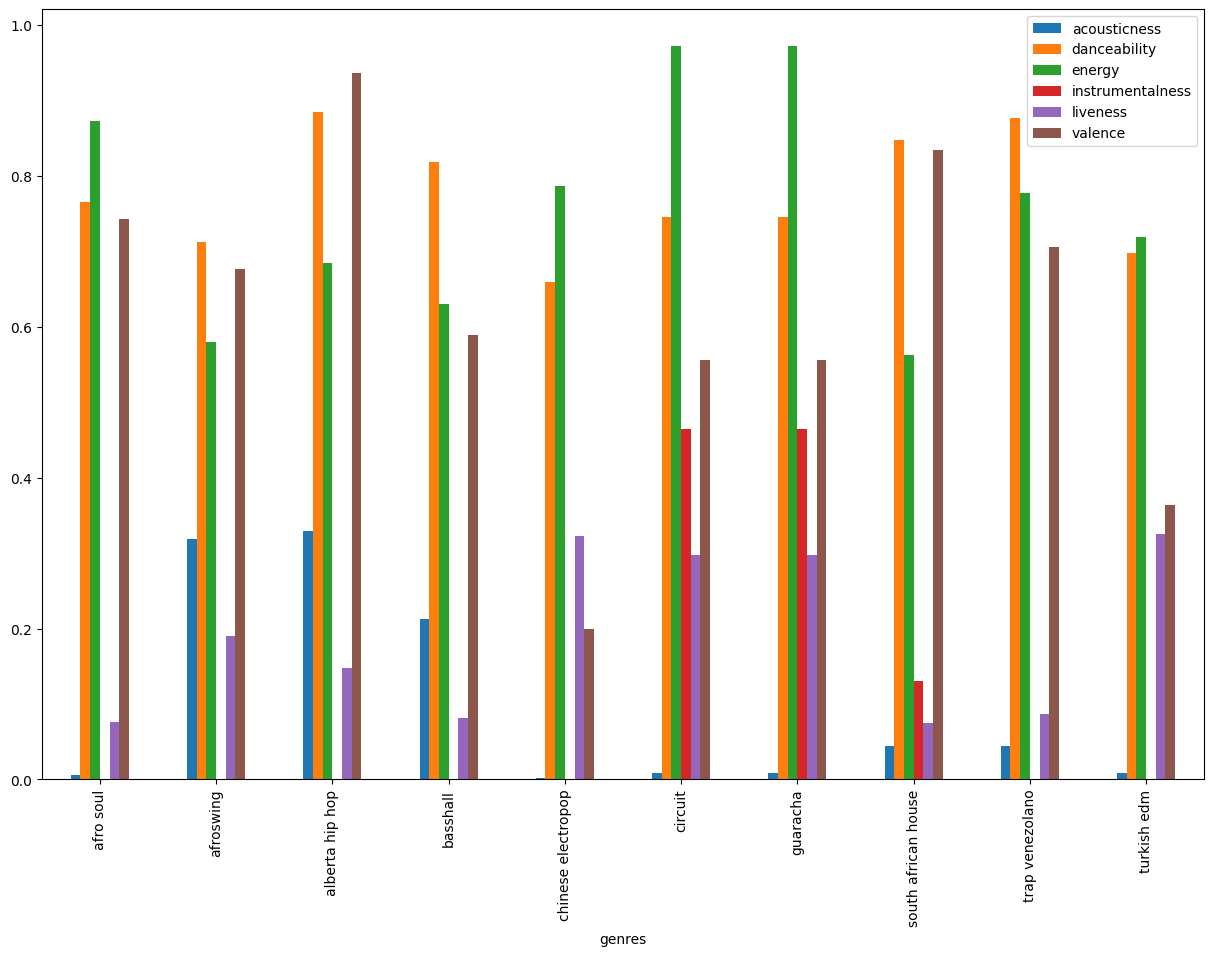

In [30]:
## sounds_features by genre (top 10 in popularity)
df = genre_data.nlargest(10, 'popularity')
df.groupby('genres').mean()[sound_features].plot(kind='bar', figsize=(15, 10))
